### Importing and Initial Preping of Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
sc=StandardScaler()

In [3]:
bf=data = pd.read_csv('BlackFridaySalesResized.csv')

In [4]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159999 entries, 0 to 159998
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     159999 non-null  int64  
 1   Product_ID                  159999 non-null  object 
 2   Gender                      159999 non-null  object 
 3   Age                         159999 non-null  object 
 4   Occupation                  159999 non-null  int64  
 5   City_Category               159999 non-null  object 
 6   Stay_In_Current_City_Years  159999 non-null  object 
 7   Marital_Status              159999 non-null  int64  
 8   Product_Category_1          159999 non-null  int64  
 9   Product_Category_2          110328 non-null  float64
 10  Product_Category_3          48940 non-null   float64
 11  Purchase                    159999 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 14.6+ MB


In [5]:
bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
missing_values = bf.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/bf.shape[0]
print(f'{missing_values *100} %')

Product_Category_3    69.412309
Product_Category_2    31.044569
dtype: float64 %


In [7]:
bf.fillna(0,inplace=True)

In [8]:
bf['Age']=bf['Age'].apply(lambda x: 1 if x=='0-17' else( 2 if x=='18-25' else(3 if x in ('26-35','36-45') else (4 if x in ('46-50','51-55','55+') else x ) )))

In [9]:
bf=pd.get_dummies(data=bf,columns=['Gender','City_Category'],drop_first=True)

In [10]:
bf["Stay_In_Current_City_Years"]=bf["Stay_In_Current_City_Years"].apply(lambda x: str(x).replace("+","") if "+" in x else x)
bf["Stay_In_Current_City_Years"]=bf["Stay_In_Current_City_Years"].apply(lambda x: int(x))

In [11]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159999 entries, 0 to 159998
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     159999 non-null  int64  
 1   Product_ID                  159999 non-null  object 
 2   Age                         159999 non-null  int64  
 3   Occupation                  159999 non-null  int64  
 4   Stay_In_Current_City_Years  159999 non-null  int64  
 5   Marital_Status              159999 non-null  int64  
 6   Product_Category_1          159999 non-null  int64  
 7   Product_Category_2          159999 non-null  float64
 8   Product_Category_3          159999 non-null  float64
 9   Purchase                    159999 non-null  int64  
 10  Gender_M                    159999 non-null  uint8  
 11  City_Category_B             159999 non-null  uint8  
 12  City_Category_C             159999 non-null  uint8  
dtypes: float64(2),

In [12]:
#dropping columns which have all the unique values
bf.drop(columns=['User_ID','Product_ID'],inplace=True)

In [13]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159999 entries, 0 to 159998
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         159999 non-null  int64  
 1   Occupation                  159999 non-null  int64  
 2   Stay_In_Current_City_Years  159999 non-null  int64  
 3   Marital_Status              159999 non-null  int64  
 4   Product_Category_1          159999 non-null  int64  
 5   Product_Category_2          159999 non-null  float64
 6   Product_Category_3          159999 non-null  float64
 7   Purchase                    159999 non-null  int64  
 8   Gender_M                    159999 non-null  uint8  
 9   City_Category_B             159999 non-null  uint8  
 10  City_Category_C             159999 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 10.2 MB


## 1.K-Means

In [14]:
from scipy.stats import zscore
X_scaled = bf.apply(zscore)

In [15]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(X_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,1.759989e+06
1,2,1.545953e+06
2,3,1.410590e+06
3,4,1.322448e+06
4,5,1.254138e+06
5,6,1.200812e+06
6,7,1.160123e+06
7,8,1.122029e+06
8,9,1.096952e+06
9,10,1.064723e+06


### K means using elbow method

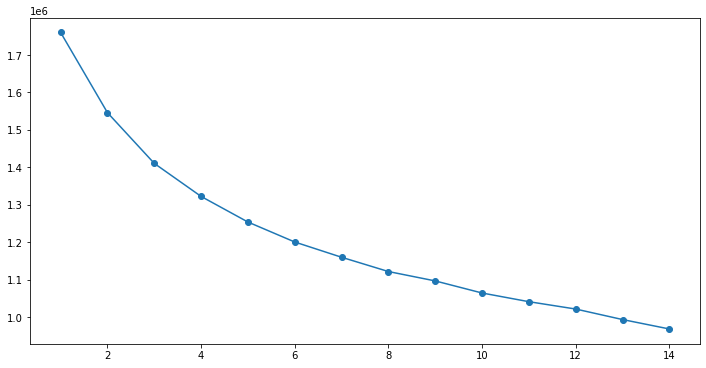

In [16]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

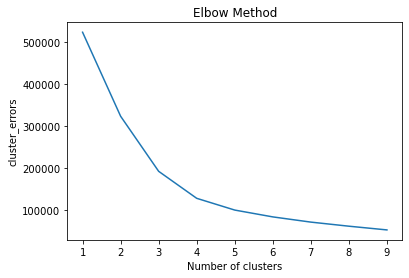

In [18]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
cluster_errors = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(X_pca)
    cluster_errors.append(kmeans.inertia_)
plt.plot(range(1,10), cluster_errors)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('cluster_errors')
plt.show()

In [19]:
print("The centroids are ", kmeans.cluster_centers_)

print("Assignments are: ")
print(kmeans.labels_)

The centroids are  [[ 0.14636269  1.89162529]
 [ 0.72662428  0.4334478 ]
 [-0.9235643  -0.32802849]
 [-2.6563619   0.45416985]
 [ 1.24777715 -0.83586196]
 [-1.39746283  1.15413441]
 [-0.17074104 -1.47288448]
 [-1.57042619 -1.83885553]
 [ 2.19439061  0.12521072]]
Assignments are: 
[1 7 8 ... 0 0 0]


## 2. Dimensional analysis

In [20]:
# Fitting K-Means to the pca model
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(X_pca)

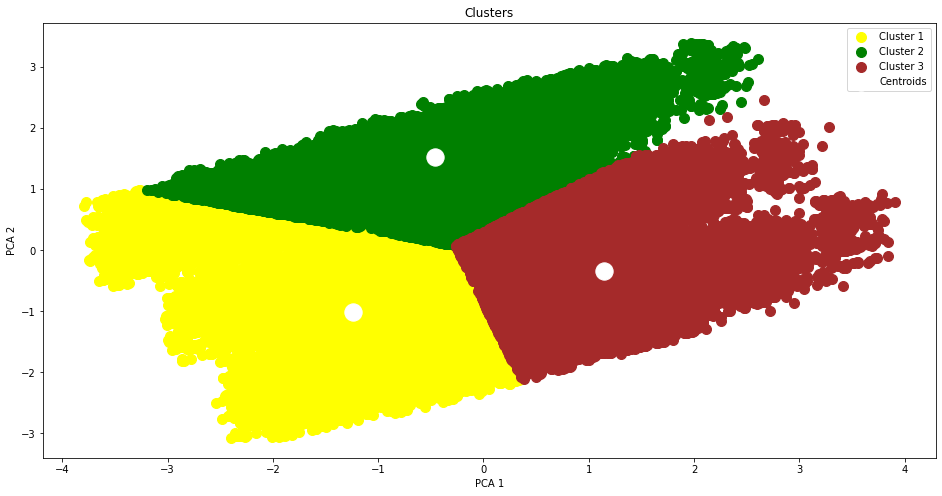

In [21]:
# figure size
plt.figure(figsize=(16,8))
# Visualising the clusters
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s = 100, c = 'brown', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'white', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


In [22]:
# Fitting K-Means to the pca model
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(X_pca)

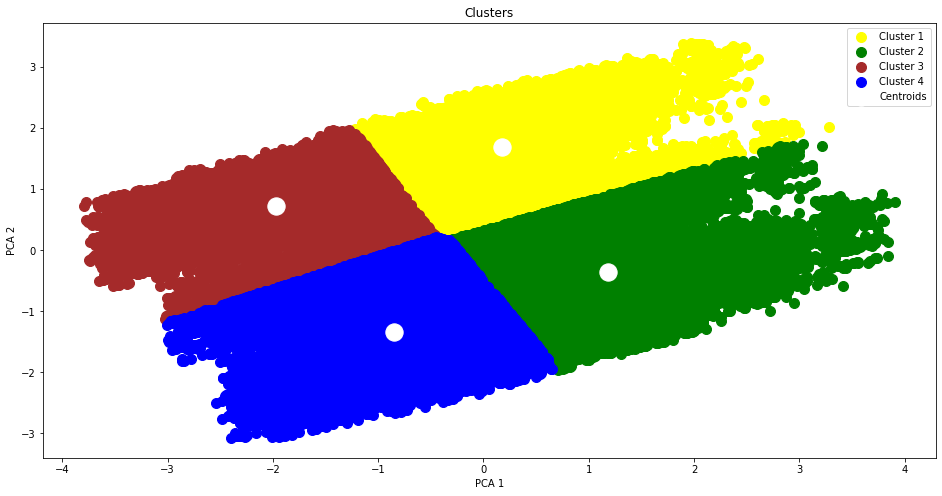

In [23]:
# figure size
plt.figure(figsize=(16,8))
# Visualising the clusters
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s = 100, c = 'brown', label = 'Cluster 3')
plt.scatter(X_pca[y_kmeans == 3, 0], X_pca[y_kmeans == 3, 1], s = 100, c = 'blue', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'white', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

## 3.What you have discovered in data?

We are conducting our analysis on data of 16000 rows and 11 columns. AS you can see from above we got 4 clusters. As our data is supervised it helps us perform different types of classifications, regression and also develop Predictive models

## 4. Anomalous data

Anomalous data is the data that doesn't fit the general pattern of overall data. Such data can be consisdered useful in amny approaches of analysis. <br>
Our selected data set is supervised and also doesn;t have any anomalous data.

## 5. Few more advanced regression/classifier tools

### Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.25)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (119999, 10)
X_test shape: (40000, 10)
y_train shape: (119999,)
y_test shape: (40000,)


In [48]:
rf = RandomForestRegressor(n_jobs=-1)

In [49]:
rf_model = rf.fit(X_train,y_train)

In [50]:
rf_pred =rf_model.predict(X_test)

In [52]:
rf_pred

array([12820.50418624,  7672.76708114,  3120.84035714, ...,
       13775.31833333, 13103.352     ,  7535.37036455])

<AxesSubplot:title={'center':'Random Forest Regressor'}>

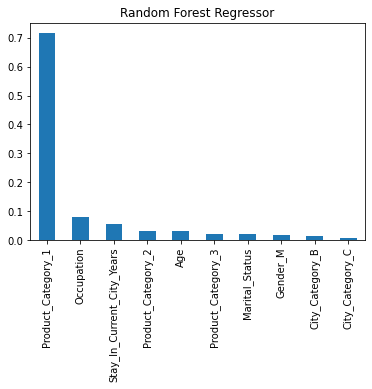

In [55]:
#Plotting the prediction of Random Forest Regression Model
rf_features = pd.Series(rf_model.feature_importances_, X.columns).sort_values(ascending=False)
rf_features.plot(kind='bar', title='Random Forest Regressor')

In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))

Mean Absolute Error: 2307.21649911169


In [61]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))

Mean Squared Error: 9927044.839649128


In [62]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

Root Mean Squared Error: 3150.7213205310823


In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn import metrics

In [66]:
print('R-squared:', r2_score(y_test, rf_pred))

R-squared: 0.5994406977308102


In [79]:
print('Variance inflation factor(VIF):', 1/(1-r2_score(y_test, rf_pred)))

Variance inflation factor(VIF): 2.496509241790034


In [83]:
accuracy = rf.score(X_test,y_test)
print('Accuracy: ',accuracy*100,'%')

Accuracy:  59.94406977308102 %


## Ridge

In [75]:
from sklearn.linear_model import Ridge

In [76]:
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [77]:
ridge_prediction=ridge.predict(X_test)

In [78]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': ridge_prediction})
df.head()

,Actual,Predicted
49889,11989,10881.703156
32693,7852,8194.713644
79957,2312,4573.958933
76365,9727,8425.864881
82342,6927,8903.981531


In [81]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ridge_prediction)))
print('R-squared:', r2_score(y_test,ridge_prediction))
print('Variance inflation factor(VIF):', 1/(1-r2_score(y_test,ridge_prediction)))

Mean Absolute Error: 3537.546043338728
Mean Squared Error: 21426281.55873582
Root Mean Squared Error: 4628.853158044206
R-squared: 0.1354429711940558
Variance inflation factor(VIF): 1.1566616968936319


In [85]:
accuracy = ridge.score(X_test,y_test)
print('Accuracy: ',accuracy*100,'%')

Accuracy:  13.544297119405579 %
